In [2]:
#load libraries

#for HTML manipulation
!pip install lxml

#for Dataframes
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize 

#for GET requests
!pip install requests
import requests
import requests #

#add on for Pandas
import csv

#for Mapping
import folium

#for JSON manipulation
import json 

#for plotting data
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#for GEOJSON files
!pip install geocoder
import geocoder
!pip install geopy
from geopy.geocoders import Nominatim

print('Libraries imported.')

Libraries imported.


In [3]:
#Link to Foursquare with Credentials.
CLIENT_ID = 'FOONXVWYCI4P53VX4WN5H3GWAMFB5JIZBD0KLUI1AI0UFCLL' # your Foursquare ID
CLIENT_SECRET = 'OTN4Y4O2HQVT3OZSR3W5CV3QKFFY00OCPEDKSW1WHLWUWHTJ' # your Foursquare Secret
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FOONXVWYCI4P53VX4WN5H3GWAMFB5JIZBD0KLUI1AI0UFCLL
CLIENT_SECRET:OTN4Y4O2HQVT3OZSR3W5CV3QKFFY00OCPEDKSW1WHLWUWHTJ


In [4]:
#Search for Grocery Stores by first defining object parameters.  
search_query = 'Grocery'
VERSION = '20200415'
LIMIT = 100
RADIUS = 7000
LAT = 43.26 
LONG = -79.87

print(search_query + ' .... OK!')

Grocery .... OK!


In [5]:
#Request Grocery Store data form Foursquare.
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, LAT, LONG, VERSION, search_query, RADIUS, LIMIT)
url
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea47e7802a172002081368d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hamilton',
  'headerFullLocation': 'Hamilton',
  'headerLocationGranularity': 'city',
  'query': 'grocery',
  'totalResults': 45,
  'suggestedBounds': {'ne': {'lat': 43.32300006300006,
    'lng': -79.78365284418435},
   'sw': {'lat': 43.19699993699994, 'lng': -79.95634715581566}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51d2d6a9498e483fe7634ebf',
       'name': 'Nations Fresh Foods',
       'location': {'address': '2 King St W',
        'crossStreet': 'in Jackson Square',
        'lat': 43.25879382816006,
        'lng': -79.87370435598505,
        'labeledLatLngs

In [6]:
#Convert Requested JSON file to a dataframe and normalize the data.
venues = results['response']['groups'][0]['items']
nearby_venues = pd.json_normalize(venues)
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,e-0-51d2d6a9498e483fe7634ebf-0,0,"[{'summary': 'This spot is popular', 'type': '...",51d2d6a9498e483fe7634ebf,Nations Fresh Foods,2 King St W,in Jackson Square,43.258794,-79.873704,"[{'label': 'display', 'lat': 43.25879382816006...",328,L8P 1A2,CA,Hamilton,ON,Canada,"[2 King St W (in Jackson Square), Hamilton ON ...","[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0,[],NaN
1,e-0-52e4081c498e41df675c6be8-1,0,"[{'summary': 'This spot is popular', 'type': '...",52e4081c498e41df675c6be8,the mustard seed,460 York Blvd,NaN,43.266149,-79.882283,"[{'label': 'display', 'lat': 43.26614926473115...",1208,L8R 3J8,CA,Hamilton,ON,Canada,"[460 York Blvd, Hamilton ON L8R 3J8, Canada]","[{'id': '4bf58dd8d48988d1f5941735', 'name': 'G...",0,[],NaN
2,e-0-4b5ca0b8f964a520cb3a29e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b5ca0b8f964a520cb3a29e3,Fortinos,65 Mall Rd,Mohawk Rd. E,43.220846,-79.859429,"[{'label': 'display', 'lat': 43.220846, 'lng':...",4442,L8V 5B5,CA,Hamilton,ON,Canada,"[65 Mall Rd (Mohawk Rd. E), Hamilton ON L8V 5B...","[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",0,[],NaN
3,e-0-4db1a9650437a93f7f8e2d5a-3,0,"[{'summary': 'This spot is popular', 'type': '...",4db1a9650437a93f7f8e2d5a,Tan Thanh Supermarket,115 Park St N,NaN,43.261117,-79.870609,"[{'label': 'display', 'lat': 43.26111672268923...",133,L8R 2N2,CA,Hamilton,ON,Canada,"[115 Park St N, Hamilton ON L8R 2N2, Canada]","[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0,[],NaN
4,e-0-4b5e2832f964a520d88029e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4b5e2832f964a520d88029e3,Fortinos,1579 Main St W,NaN,43.255337,-79.928868,"[{'label': 'display', 'lat': 43.255337, 'lng':...",4800,L8S 1E6,CA,Hamilton,ON,Canada,"[1579 Main St W, Hamilton ON L8S 1E6, Canada]","[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0,[],NaN
5,e-0-4bce3304cc8cd13afaf6c3cf-5,0,"[{'summary': 'This spot is popular', 'type': '...",4bce3304cc8cd13afaf6c3cf,Keon's Super Convenience,77 King St E,John St,43.256003,-79.867122,"[{'label': 'display', 'lat': 43.25600337744421...",502,NaN,CA,Hamilton,ON,Canada,"[77 King St E (John St), Hamilton ON, Canada]","[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0,[],NaN
6,e-0-4c0580d11cead13aeea5a1db-6,0,"[{'summary': 'This spot is popular', 'type': '...",4c0580d11cead13aeea5a1db,B&T Food Centre,103 Queen St N,at York Blvd,43.262428,-79.877555,"[{'label': 'display', 'lat': 43.26242751674207...",669,L8R 2V5,CA,Hamilton,ON,Canada,"[103 Queen St N (at York Blvd), Hamilton ON L8...","[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0,[],NaN
7,e-0-4c373b021e06d13ab67f753e-7,0,"[{'summary': 'This spot is popular', 'type': '...",4c373b021e06d13ab67f753e,J&J Marketplace,163 James Street South,Duke Street,43.252044,-79.871101,"[{'label': 'display', 'lat': 43.252044, 'lng':...",890,NaN,CA,Hamilton,ON,Canada,"[163 James Street South (Duke Street), Hamilto...","[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0,[],NaN
8,e-0-4be5b33fbcef2d7fef2b04e5-8,0,"[{'summary': 'This spot is popular', 'type': '...",4be5b33fbcef2d7fef2b04e5,Towne Convenience,212 John Street South,NaN,43.250624,-79.868556,"[{'label': 'display', 'lat': 43.250624, 'lng':...",1050,NaN,CA,Hamilton,ON,Canada,"[212 John Street South, Hamilton ON, Canada]","[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0,[],NaN
9,e-0-4bdcb8a0afe8c9b64eb25085-9,0,"[{'summary': 'This spot is popular', 'type': '...",4bdcb8a0afe8c9b64eb25085,Hasty Market,NaN,Forest,43.250431,-79.868519,"[{'label': 'display', 'lat': 43.25043124724919...",1071,NaN,CA,Hamilton,ON,Canada,"[Hamilton ON, 

In [7]:
#Process Data

#Filter columns to clean up the dataframe.
filtered_columns = ['venue.name', 'venue.location.lat', 'venue.location.lng']

#Slice dataframe.
grocery_venues =nearby_venues.loc[:, filtered_columns]
grocery_venues

#Clean Column Names
grocery_venues.columns = [col.split(".")[-1] for col in grocery_venues.columns]

#display dataframe.
grocery_venues.style.hide_index()

name,lat,lng
Nations Fresh Foods,43.258794,-79.873704
the mustard seed,43.266149,-79.882283
Fortinos,43.220846,-79.859429
Tan Thanh Supermarket,43.261117,-79.870609
Fortinos,43.255337,-79.928868
Keon's Super Convenience,43.256003,-79.867122
B&T Food Centre,43.262428,-79.877555
J&J Marketplace,43.252044,-79.871101
Towne Convenience,43.250624,-79.868556
Hasty Market,43.250431,-79.868519


In [8]:
#Search for Drugstores by first defining object parameters.  
search_query = 'Drugstore'
VERSION = '20200415'
LIMIT = 100
RADIUS = 7000
LAT = 43.26 
LONG = -79.87

print(search_query + ' .... OK!')

Drugstore .... OK!


In [9]:
#Request data form Foursquare.
url2 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, LAT, LONG, VERSION, search_query, RADIUS, LIMIT)
url2
results2 = requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5ea47f8c211536324be8b252'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hamilton',
  'headerFullLocation': 'Hamilton',
  'headerLocationGranularity': 'city',
  'query': 'drugstore',
  'totalResults': 65,
  'suggestedBounds': {'ne': {'lat': 43.32300006300006,
    'lng': -79.78365284418435},
   'sw': {'lat': 43.19699993699994, 'lng': -79.95634715581566}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d86473b509137040989a85b',
       'name': 'Shoppers Drug Mart',
       'location': {'address': '232 Cannon St E',
        'lat': 43.257928,
        'lng': -79.857067,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.257928,
  

In [10]:
#Convert Requested JSON file to a dataframe and normalize the data.
venues2 = results2['response']['groups'][0]['items']
nearby_venues2 = pd.json_normalize(venues2)
nearby_venues2

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.venuePage.id
0,e-0-4d86473b509137040989a85b-0,0,"[{'summary': 'This spot is popular', 'type': '...",4d86473b509137040989a85b,Shoppers Drug Mart,232 Cannon St E,43.257928,-79.857067,"[{'label': 'display', 'lat': 43.257928, 'lng':...",1073,L8L 0A9,CA,Hamilton,ON,Canada,"[232 Cannon St E, Hamilton ON L8L 0A9, Canada]","[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",0,[],NaN,NaN
1,e-0-4ef5165e6da1a067a732be5a-1,0,"[{'summary': 'This spot is popular', 'type': '...",4ef5165e6da1a067a732be5a,Shoppers Drug Mart,181 Main St W,43.256980,-79.877739,"[{'label': 'display', 'lat': 43.25698, 'lng': ...",711,L8P 4S1,CA,Hamilton,ON,Canada,[181 Main St W (Main Street West & Hess Street...,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",0,[],Main Street West & Hess Street,NaN
2,e-0-4c378c5f18e72d7f69be16f5-2,0,"[{'summary': 'This spot is popular', 'type': '...",4c378c5f18e72d7f69be16f5,Shoppers Drug Mart,620 King St W,43.262307,-79.887374,"[{'label': 'display', 'lat': 43.262307, 'lng':...",1431,L8P 1C2,CA,Hamilton,ON,Canada,"[620 King St W (at Dundurn St. N), Hamilton ON...","[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",0,[],at Dundurn St. N,NaN
3,e-0-4cd3343c558a37040bcabfa6-3,0,"[{'summary': 'This spot is popular', 'type': '...",4cd3343c558a37040bcabfa6,Shoppers Drug Mart,113 Herkimer St,43.250290,-79.878558,"[{'label': 'display', 'lat': 43.25029, 'lng': ...",1284,L8P 2G8,CA,Hamilton,ON,Canada,"[113 Herkimer St (at Caroline St. S), Hamilton...","[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",0,[],at Caroline St. S,NaN
4,e-0-4c366e7493db0f47ec1e1e92-4,0,"[{'summary': 'This spot is popular', 'type': '...",4c366e7493db0f47ec1e1e92,Shoppers Drug Mart,753 Main St E,43.247689,-79.839449,"[{'label': 'display', 'lat': 43.247689, 'lng':...",2830,L8M 1L2,CA,Hamilton,ON,Canada,"[753 Main St E, Hamilton ON L8M 1L2, Canada]","[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",0,[],NaN,NaN
5,e-0-4df6c47145dd222116c7a37b-5,0,"[{'summary': 'This spot is popular', 'type': '...",4df6c47145dd222116c7a37b,Shoppers Drug Mart,661 Upper James St,43.236946,-79.877695,"[{'label': 'display', 'lat': 43.236946, 'lng':...",2641,L9C 5R8,CA,Hamilton,ON,Canada,"[661 Upper James St, Hamilton ON L9C 5R8, Canada]","[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",0,[],NaN,NaN
6,e-0-5b2136d0d552c7002c0e72d1-6,0,"[{'summary': 'This spot is popular', 'type': '...",5b2136d0d552c7002c0e72d1,I.D.A. - City Centre Pharmacy,"77 James St N,Unit 131",43.258423,-79.869233,"[{'label': 'display', 'lat': 43.258423, 'lng':...",186,L8R 2K3,CA,Hamilton,ON,Canada,"[77 James St N,Unit 131, Hamilton ON L8R 2K3, ...","[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",0,[],NaN,NaN
7,e-0-4ba4e6e3f964a520eac038e3-7,0,"[{'summary': 'This spot is popular', 'type': '...",4ba4e6e3f964a520eac038e3,Rexall,"2 King St W,Unit 18",43.258269,-79.873060,"[{'label': 'display', 'lat': 43.258269, 'lng':...",314,L8P 1A1,CA,Hamilton,ON,Canada,"[2 King St W,Unit 18 (at James St. N), Hamilto...","[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",0,[],at James St. N,NaN
8,e-0-5a6b451c1213844d7a3d1435-8,0,"[{'summary': 'This spot is popular', 'type': '...",5a6b451c1213844d7a3d1435,Shoppers Drug Mart,1183 Barton St E,43.263756,-79.866132,"[{'label': 'display', 'lat': 43.263756, 'lng':...",522,L8H 2V4,CA,Hamilton,ON,Canada,"[1183 Barton St E, Hamilton ON L8H 2V4, Canada]","[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",0,[],NaN,NaN
9,e-0-4b7aa093f964a52048342fe3-9,0,"[{'summary': 'This spot is popular', 'type': '...",4b7aa093f964a52048342fe3,Shoppers Drug Mart,510 Concession St,43.241225,-79.854635,"[{'

In [11]:
#Process Data.

#filter columns to clean up the dataframe.
filtered_columns2 = ['venue.name', 'venue.location.lat', 'venue.location.lng']

#Slice dataframe.
drugstore_venues =nearby_venues2.loc[:, filtered_columns2]
drugstore_venues

#Clean Column Names
drugstore_venues.columns = [col.split(".")[-1] for col in drugstore_venues.columns]

#Display dataframe
drugstore_venues.style.hide_index()

name,lat,lng
Shoppers Drug Mart,43.257928,-79.857067
Shoppers Drug Mart,43.256980,-79.877739
Shoppers Drug Mart,43.262307,-79.887374
Shoppers Drug Mart,43.250290,-79.878558
Shoppers Drug Mart,43.247689,-79.839449
Shoppers Drug Mart,43.236946,-79.877695
I.D.A. - City Centre Pharmacy,43.258423,-79.869233
Rexall,43.258269,-79.873060
Shoppers Drug Mart,43.263756,-79.866132
Shoppers Drug Mart,43.241225,-79.854635


In [12]:
#Map Grocery stores in Hamilton using the Grocery dataframe.

#Co-ordinates for Hamilton
neighborhood_latitude = 43.26 
neighborhood_longitude = -79.87

#Generate Map of Hamilton.
grocery_map = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=12, tiles = "Stamen Toner")

#Add all venues as green circle markers.
for lat, lng, name in zip(grocery_venues.lat, grocery_venues.lng, grocery_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(grocery_map)
    
#Display map.
grocery_map

In [13]:
#Map Drugstores in Hamilton using the Drugstores dataframe.

#Co-ordinates for Hamilton.
neighborhood_latitude = 43.26 
neighborhood_longitude = -79.87

#Generate Map of Hamilton.
drugstore_map = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=12, tiles = "Stamen Toner")

#Add all venues as blue circle markers.
for lat, lng, name in zip(drugstore_venues.lat, drugstore_venues.lng, drugstore_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(drugstore_map)

#Display map.
drugstore_map

In [14]:
#Map both types of stores in Hamilton on one map.

#Co-ordinates for Hamilton.
neighborhood_latitude = 43.26 
neighborhood_longitude = -79.87

#Generate Map of Hamilton.
combined_map = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=12, tiles = "Stamen Toner")

#Add all Grocery venues as green circle markers.
for lat, lng, name in zip(grocery_venues.lat, grocery_venues.lng, grocery_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(combined_map)
    
#Add all Drugstore venues as blue circle markers.
for lat, lng, name in zip(drugstore_venues.lat, drugstore_venues.lng, drugstore_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(combined_map)    
        
        
#Display map.
combined_map

In [15]:
#Upload Excel Data containing Data on Hamilton's Wards and covert it to a dataframe.
summarydata = pd.read_excel('Downloads/2016DataHamiltonWards.xlsx')

#Process data.

#Drop NA values from the dataframe.
summarydata.dropna(inplace=True)
summarydata.reset_index(drop=True, inplace=True)

#Drop Postal Codes Column.
summarydata.drop('Postal Codes', axis=1, inplace=True)

#Change dataframe index to start from 1 instead of 0.
summarydata.index = summarydata.index + 1
summarydata


,Ward,Name,Latitude,Longitude,Population
1,1,Chedoke-Cootes,43.261,-79.916,29850.0
2,2,Downtown Hamilton,43.402,-80.017,33600.0
3,3,Hamilton Centre,43.254,-79.841,41205.0
4,4,East Hamilton,43.224,-79.699,38595.0
5,5,Red Hill,43.238,-79.805,41855.0
6,6,East Mountain,43.196,-79.851,38650.0
7,7,Central Mountain,43.232,-79.845,47460.0
8,8,West-Central Mountain,43.231,-79.905,34485.0
9,9,Upper Stoney Creek,43.184,-79.721,28760.0
10,10,Lower Stoney Creek,43.216,-79.742,37215.0


In [16]:
#Find the Percentage of the Population in each Ward and add the values to the dataframe.
summarydata['Percentage of Population']=summarydata["Population"]/536920*100

#Display dataframe.
summarydata.style.hide_index()

Ward,Name,Latitude,Longitude,Population,Percentage of Population
1,Chedoke-Cootes,43.261,-79.916000,29850.000000,5.559487
2,Downtown Hamilton,43.402,-80.017000,33600.000000,6.257916
3,Hamilton Centre,43.254,-79.841000,41205.000000,7.674328
4,East Hamilton,43.224,-79.699000,38595.000000,7.188222
5,Red Hill,43.238,-79.805000,41855.000000,7.795389
6,East Mountain,43.196,-79.851000,38650.000000,7.198465
7,Central Mountain,43.232,-79.845000,47460.000000,8.839306
8,West-Central Mountain,43.231,-79.905000,34485.000000,6.422745
9,Upper Stoney Creek,43.184,-79.721000,28760.000000,5.356478
10,Lower Stoney Creek,43.216000,-79.742000,37215.000000,6.931200


In [17]:
#Prepare population data for graphing by creating a new dataframe.
popdata = summarydata[['Ward','Population']]

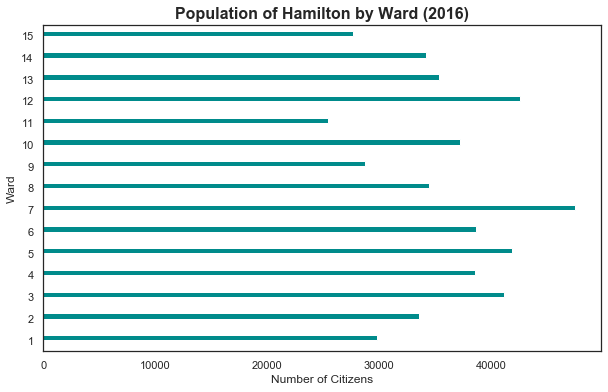

In [18]:
#Plot dataframe as a horizontal bar graph.

#Seaborn Set Style.
sns.set()
sns.set_style("white")

#Plot horizontal bar graph.
popdata.plot(kind="barh",figsize=(10,6), color='darkcyan', legend=None)

plt.xlabel('Number of Citizens')
plt.ylabel('Ward')

plt.title('Population of Hamilton by Ward (2016)', fontsize=16, fontweight='bold')

plt.show()

In [161]:
#Sort the data by Population Size to find the Top 5 Most Populated Wards.
summarydata.sort_values(by=['Population'],ascending=False, inplace=True)
summarydata.style.hide_index()

#Create a dataframe with the Top 5 Wards.
top5data=summarydata.head()
top5data.style.hide_index()





Ward,Name,Latitude,Longitude,Population,Percentage of Population
7,Central Mountain,43.232,-79.845000,47460.000000,8.839306
12,Ancaster,43.218000,-79.984000,42560.000000,7.926693
5,Red Hill,43.238,-79.805000,41855.000000,7.795389
3,Hamilton Centre,43.254,-79.841000,41205.000000,7.674328
6,East Mountain,43.196,-79.851000,38650.000000,7.198465


In [162]:
#Prepare top 5 ward population data for graphing by creating a new dataframe.
topdata = top5[['Ward','Population']]

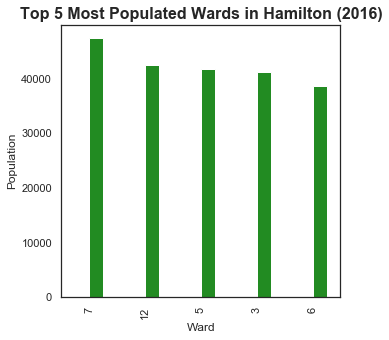

In [163]:
#Plot dataframe as a horizontal bar graph.

#Seaborn Set Style.
sns.set()
sns.set_style("white")

#Plot bar graph.
topdata.plot(kind="bar",figsize=(5,5),color='forestgreen', legend=None)
plt.xlabel('Ward')
plt.ylabel('Population')
plt.title('Top 5 Most Populated Wards in Hamilton (2016)', fontsize=16, fontweight='bold')
plt.show()

In [164]:
#Prepare top 5 venue data for graphing by creating a new dataframe.
topcount=top5[['Ward','Venues']]

In [121]:
#Find the sum of the % of the Population of the Top 5 Wards.
Total = top5['Percentage of Population'].sum()
print(Total)

39.43418013856813


In [122]:
#Retrieve GEOJSON from City of Hamilton Data Repository
url= 'https://opendata.arcgis.com/datasets/8b0b1f2bf8bb4e1da3a1bf567b17b77f_7.geojson'
r = requests.get(url)
print(url)

https://opendata.arcgis.com/datasets/8b0b1f2bf8bb4e1da3a1bf567b17b77f_7.geojson


In [123]:
#Read the GEOJSON File
ham_geo='Downloads/Ward_Boundaries.json'
ham_geo

'Downloads/Ward_Boundaries.json'

In [124]:
#Map stores in Hamilton
neighborhood_latitude = 43.26 
neighborhood_longitude = -79.87

complete_map = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=12, tiles = "Stamen Toner")

# add all Grocery venues as blue circle markers
for lat, lng, name in zip(grocery_venues.lat, grocery_venues.lng, grocery_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(complete_map)
    
# add all Drugstore venues as green circle markers
for lat, lng, name in zip(drugstore_venues.lat, drugstore_venues.lng, drugstore_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(complete_map)    
        
# add a red circle marker to represent Central Mountain
folium.features.CircleMarker(
    [43.232, -79.845],
    radius=30,
    color='red',
    popup='Ward 7 - Central Mountain',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(complete_map)   
    
# add a red circle marker to represent Ancaster
folium.features.CircleMarker(
    [43.215, -79.984],
    radius=25,
    color='red',
    popup='Ward 12 - Ancaster',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(complete_map)      

# add a red circle marker to represent Red Hill
folium.features.CircleMarker(
    [43.238, -79.805],
    radius=20,
    color='red',
    popup='Ward 5 - Red Hill',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(complete_map)    

# add a red circle marker to represent Hamilton Centre
folium.features.CircleMarker(
    [43.254, -79.841],
    radius=20,
    color='red',
    popup='Ward 3 - Hamilton Centre',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(complete_map)   


# add a red circle marker to represent East Mountain
folium.features.CircleMarker(
    [43.196, -79.851],
    radius=15,
    color='red',
    popup='Ward 6 - East Mountain',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(complete_map)   

complete_map

In [125]:
#Map stores in Hamilton with GEOJSON Layer with Ward Boundaries
neighborhood_latitude = 43.26 
neighborhood_longitude = -79.87

complete_map2 = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=12, tiles = "Stamen Toner")

# add all Grocery venues as black circle markers
for lat, lng, name in zip(grocery_venues.lat, grocery_venues.lng, grocery_venues.name):
    folium.features.CircleMarker(
        [lat, lng],   
        radius=5,
        color='black',
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(complete_map2)
    
# add all Drugstore venues as grey circle markers
for lat, lng, name in zip(drugstore_venues.lat, drugstore_venues.lng, drugstore_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(complete_map2)    
        
# add a black outlined circle marker to represent Central Mountain
folium.features.CircleMarker(
    [43.232, -79.845],
    radius=15,
    color='black',
    popup='Ward 7 - Central Mountain',
    fill = True,
    fill_color = 'white',
    fill_opacity = 0.6
).add_to(complete_map2)   
    
# add a black outlined circle marker to represent Ancaster
folium.features.CircleMarker(
    [43.215, -79.984],
    radius=15,
    color='black',
    popup='Ward 12 - Ancaster',
    fill = True,
    fill_color = 'white',
    fill_opacity = 0.6
).add_to(complete_map2)      

# add a black outlined circle marker to represent Red Hill
folium.features.CircleMarker(
    [43.238, -79.805],
    radius=15,
    color='black',
    popup='Ward 5 - Red Hill',
    fill = True,
    fill_color = 'white',
    fill_opacity = 0.6
).add_to(complete_map2)    

# add a black outlined circle marker to represent Hamilton Centre
folium.features.CircleMarker(
    [43.254, -79.841],
    radius=15,
    color='black',
    popup='Ward 3 - Hamilton Centre',
    fill = True,
    fill_color = 'white',
    fill_opacity = 0.6
).add_to(complete_map2)   


# add a black outlined circle marker to represent East Mountain
folium.features.CircleMarker(
    [43.196, -79.851],
    radius=15,
    color='black',
    popup='Ward 6 - East Mountain',
    fill = True,
    fill_color = 'white',
    fill_opacity = 0.6
).add_to(complete_map2)   

#Add GeoJSON feature/layer
folium.GeoJson(ham_geo, name='geojson').add_to(complete_map2)

complete_map2

In [126]:
#Save as HTML file as cannot be viewed in Jupyter Notebook
complete_map2.save('Downloads/map2.html')
print('File Saved!')

File Saved!


In [127]:
#Map stores in Hamilton with COVID-19 Assessment Centres
neighborhood_latitude = 43.26 
neighborhood_longitude = -79.87

complete_map3 = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=12, tiles = "Stamen Toner")

# add all Grocery venues as blue circle markers
for lat, lng, name in zip(grocery_venues.lat, grocery_venues.lng, grocery_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(complete_map3)
    
# add all Drugstore venues as green circle markers
for lat, lng, name in zip(drugstore_venues.lat, drugstore_venues.lng, drugstore_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(complete_map3)    
        
# add a yellow circle marker to West End COVID Clinic
folium.features.CircleMarker(
    [43.260, -79.897],
    radius=20,
    color='yellow',
    popup='COVID Clinic',
    fill = True,
    fill_color = 'yellow',
    fill_opacity = 0.6
).add_to(complete_map3)   

# add a yellow circle marker to East End COVID Clinic
folium.features.CircleMarker(
    [43.222, -79.772],
    radius=20,
    color='yellow',
    popup='COVID Clinic',
    fill = True,
    fill_color = 'yellow',
    fill_opacity = 0.6
).add_to(complete_map3)

        
# add a red circle marker to represent Central Mountain
folium.features.CircleMarker(
    [43.232, -79.845],
    radius=30,
    color='red',
    popup='Ward 7 - Central Mountain',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(complete_map3)   
    
# add a red circle marker to represent Ancaster
folium.features.CircleMarker(
    [43.215, -79.984],
    radius=25,
    color='red',
    popup='Ward 12 - Ancaster',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(complete_map3)      

# add a red circle marker to represent Red Hill
folium.features.CircleMarker(
    [43.238, -79.805],
    radius=20,
    color='red',
    popup='Ward 5 - Red Hill',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(complete_map3)    

# add a red circle marker to represent Hamilton Centre
folium.features.CircleMarker(
    [43.254, -79.841],
    radius=20,
    color='red',
    popup='Ward 3 - Hamilton Centre',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(complete_map3)   


# add a red circle marker to represent East Mountain
folium.features.CircleMarker(
    [43.196, -79.851],
    radius=15,
    color='red',
    popup='Ward 6 - East Mountain',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(complete_map3)   



complete_map3

In [197]:
#Upload Excel Data containing Data on Hamilton's Wards and covert it to a dataframe.
countdata = pd.read_excel('Downloads/venuecount.xlsx')

#Sort the data by Population Size to find the Top 5 Most Populated Wards.
countdata.sort_values(by=['Venues'],ascending=False, inplace=True)
countdata.style.hide_index()


Ward,Name,Venues
7,Central Mountain,15
3,Hamilton Centre,12
6,East Mountain,9
5,Red Hill,7
12,Ancaster,3
